       
<h1 style="text-align:center">Interactive Mapmaking with Python</h1>

<p style="text-align:center">Sangarshanan</p>


# Data + Pandas <3 


<img src="memes/1.jpg" alt="Italian Trulli" style="text-align:center;">


In [1]:
import pandas
df = pandas.read_csv('data/cities.csv')
df.head()

,name,longitude,latitude
0,Vatican City,12.453387,41.903282
1,San Marino,12.441770,43.936096
2,Vaduz,9.516669,47.133724
3,Luxembourg,6.130003,49.611660
4,Palikir,158.149974,6.916644


# Data with a location component 

Geometries

- Point (latitude, longitude)
- Polygon [point1, point2]

We can also have linestrings, multipolygons, circles etc

# Enter GeoPandas 

- Work with a Familiar interface (Pandas)

- Read/ write GIS data (Fiona)

- Perform spatial operations like merge/join/overlay etc (Shapely)

- Plot em on a map (Matplotlib)

- Handle the projections (PyProj)

In [2]:
df.head()

,name,longitude,latitude
0,Vatican City,12.453387,41.903282
1,San Marino,12.441770,43.936096
2,Vaduz,9.516669,47.133724
3,Luxembourg,6.130003,49.611660
4,Palikir,158.149974,6.916644


In [2]:
import geopandas
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))
gdf.head()

NameError: name 'df' is not defined

### With geopandas, its as simple as .plot()

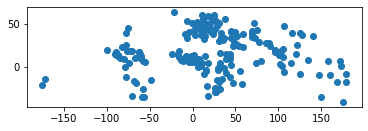

In [14]:
import matplotlib.pyplot as plt
gdf.plot()

<img src="memes/2.jpg" alt="Italian Trulli" style="text-align:center;">


## How to create interactive maps with geopandas ?

<img src="memes/3.png" alt="Italian Trulli" style="text-align:center;">


# Geojson Plots

In [51]:
gjson = gdf.to_json()
import folium
mapa = folium.Map(location = [-15.783333, -47.866667],
                  zoom_start=1,
                  tiles='cartodbpositron')
points = folium.features.GeoJson(gjson, 
                                tooltip=folium.GeoJsonTooltip(fields=['name']))
mapa.add_child(points)
mapa

In [6]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


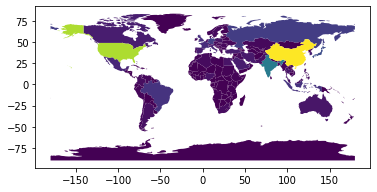

In [25]:
world.plot(column= 'gdp_md_est')

In [7]:
import branca.colormap as cm
colormap = cm.linear.YlGnBu_09.to_step(data=world['gdp_md_est'],
                                       n=10)
colormap

In [46]:
m = folium.Map()
style_function = lambda x: {"weight":0.5, 
                            'color':'black',
                            'fillColor':colormap(x['properties']['gdp_md_est']), 
                            'fillOpacity':0.75}
folium.GeoJson(
    world.to_json(),
    control=False,
    tooltip=folium.GeoJsonTooltip(fields= ["name", "gdp_md_est"]),
    style_function=style_function
).add_to(m)
colormap.add_to(m)
m

## Marker Clusters

In [43]:
from folium.plugins import MarkerCluster
locations = []
for idx, row in gdf.iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])

m = folium.Map()
m.add_child(MarkerCluster(locations=locations))
m

# Heatmap

In [55]:
from folium.plugins import HeatMap
m = folium.Map()
m.add_child(HeatMap(locations, radius=15))
m

# Mo data Mo problems 

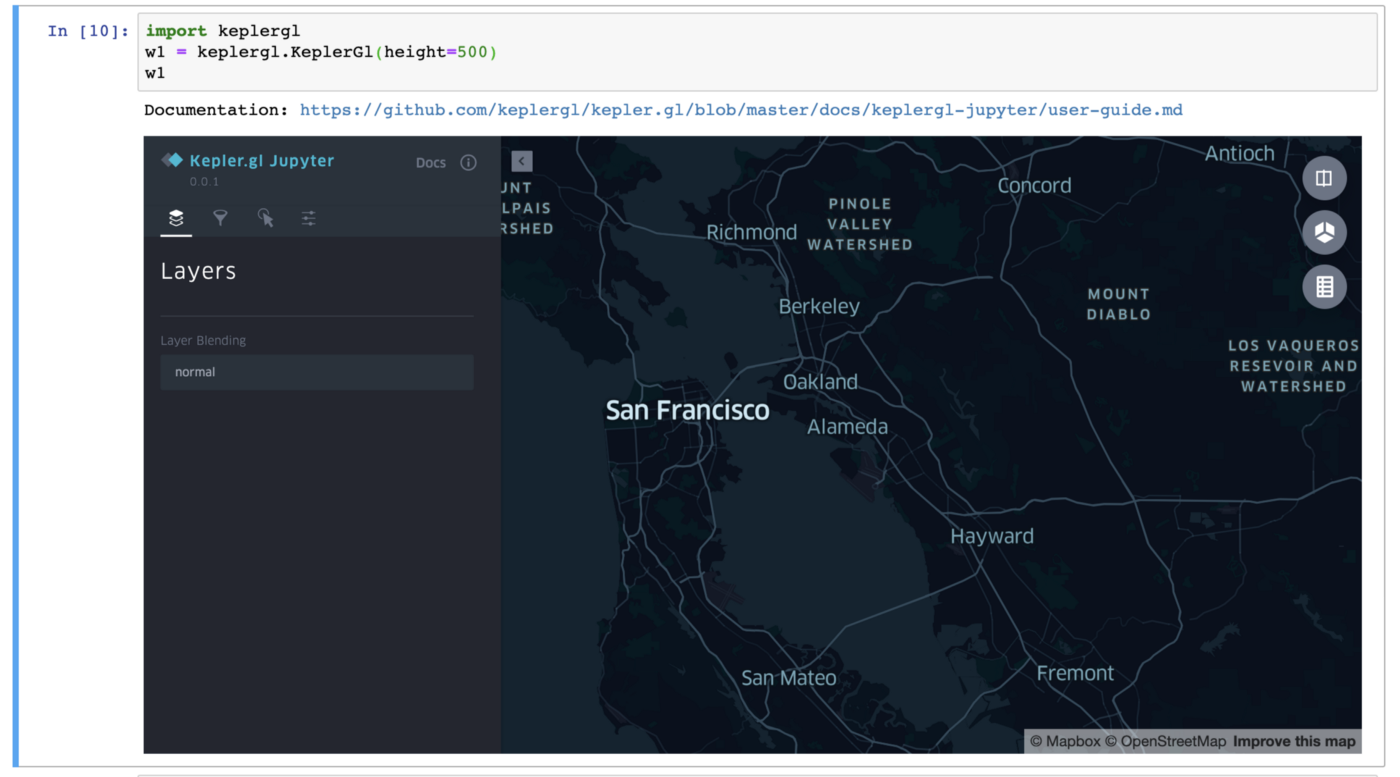

# A new one, why ? 

- Different libraries have different APIs


- All of them are awesome and have something new and exciting and offer 


- Netflix Syndrome 

- I wanna be able to switch between them without having to remember all the interfaces/ spend time googling 

In [4]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [7]:
import geopatra
cities.folium.plot(zoom=2)